In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:\\Users\\user\\los-angeles-crime-data-master\\la_crime_200_recs.csv')

In [7]:
num_rows = df.shape[0] 
num_columns = df.shape[1] 
print(f"Количество строк: {num_rows}") 
print(f"Количество столбцов: {num_columns}")

Количество строк: 199
Количество столбцов: 26


In [16]:
# Получение типов данных столбцов 
df_types = df.dtypes 
# Вывод типов данных столбцов 
print(df_types)

dr_number                   int64
date_reported              object
date_occurred              object
time_occurred               int64
area_id                     int64
area_name                  object
reporting_district          int64
crime_code                  int64
crime_code_description     object
mo_codes                   object
victim_age                float64
victim_sex                 object
victim_descent             object
premise_code                int64
premise_description        object
weapon _used_code         float64
weapon_description         object
status_code                object
status_description         object
crime_code_1                int64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
address                    object
cross_street               object
location                   object
dtype: object


In [10]:
# Подсчет пропущенных значений 
missing_values = df.isnull().sum() 
 
# Общее количество пропущенных значений 
total_missing = missing_values.sum() 
 
# Вывод результатов 
print("Пропущенные значения по столбцам:") 
print(missing_values) 
print("Общее количество пропущенных значений:", total_missing)

Пропущенные значения по столбцам:
dr_number                   0
date_reported               0
date_occurred               0
time_occurred               0
area_id                     0
area_name                   0
reporting_district          0
crime_code                  0
crime_code_description      0
mo_codes                   69
victim_age                 81
victim_sex                 63
victim_descent             63
premise_code                0
premise_description         0
weapon _used_code         123
weapon_description        123
status_code                 0
status_description          0
crime_code_1                0
crime_code_2              163
crime_code_3              199
crime_code_4              199
address                     0
cross_street              104
location                    0
dtype: int64
Общее количество пропущенных значений: 1187


In [15]:
# Подсчет количества жертв мужчин и женщин 
male_victims = df[df['victim_sex'] == 'M'].shape[0] 
female_victims = df[df['victim_sex'] == 'F'].shape[0] 
print('мужчины-жертвы: ', male_victims)
print('женщины-жертвы: ', female_victims)
# Сравнение результатов 
if male_victims > female_victims: 
    print("Мужчин-жертв больше, чем женщин-жертв.") 
elif male_victims < female_victims: 
    print("Женщин-жертв больше, чем мужчин-жертв.") 
else: 
    print("Число мужчин-жертв и женщин-жертв одинаково.")


мужчины-жертвы:  82
женщины-жертвы:  54
Мужчин-жертв больше, чем женщин-жертв.


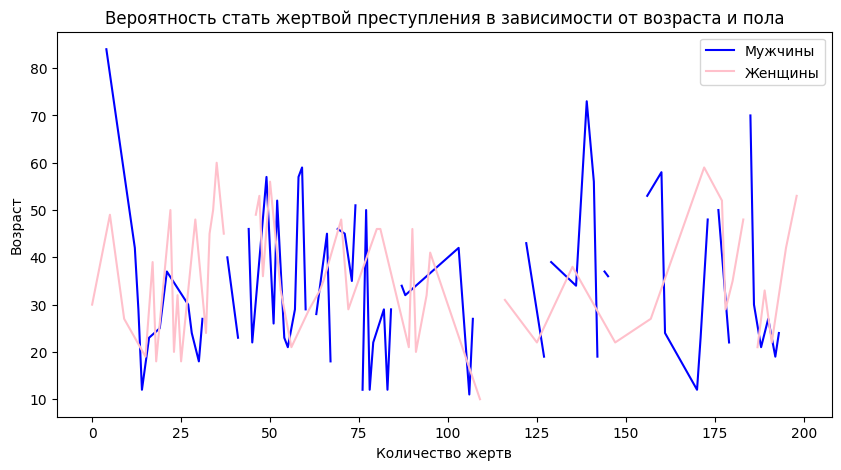

становятся жертвами преступления в возрасте:  0    12.0
1    29.0
Name: victim_age, dtype: float64


In [51]:
# выделяем данные по мужчинам и женщинам 
men_df = df[df['victim_sex'] == 'M'] 
women_df = df[df['victim_sex'] == 'F'] 
 
# создаем график 
plt.figure(figsize=(10,5)) 
 
# строим линии для мужчин и женщин 
plt.plot(men_df['victim_age'], label = 'Мужчины', color='blue') 
plt.plot(women_df['victim_age'], label = 'Женщины', color='pink') 
 
# добавляем легенду и заголовок 
plt.legend(loc='upper right') 
plt.title('Вероятность стать жертвой преступления в зависимости от возраста и пола') 
 
# добавляем подписи к осям 
plt.xlabel('Количество жертв') 
plt.ylabel('Возраст') 
 # выводим график 
plt.show()

male_victims = df[(df['victim_sex'] == 'M')] 
 
# Находим наиболее часто встречающийся возраст среди мужских жертв преступлений 
common_age = male_victims['victim_age'].mode() 
 
print(f'становятся жертвами преступления в возрасте: ', common_age)


In [22]:
# Группировка данных по полу и типу преступления и подсчет количества случаев 
grouped_df = df.groupby(['victim_sex', 'crime_code_description']).size().reset_index(name='количество') 
 
women_df = grouped_df[grouped_df['victim_sex'] == 'F'] 
men_df = grouped_df[grouped_df['victim_sex'] == 'M'] 
 
# Сортировка данных 
women_df = women_df.sort_values(by='количество', ascending=False) 
men_df = men_df.sort_values(by='количество', ascending=False) 
 
print("Женщины:") 
print(women_df) 
 
print("Мужчины:") 
print(men_df)

Женщины:
   victim_sex                             crime_code_description  количество
11          F                  INTIMATE PARTNER - SIMPLE ASSAULT          17
2           F                           BATTERY - SIMPLE ASSAULT           8
12          F                                            ROBBERY           4
5           F                              BURGLARY FROM VEHICLE           4
0           F     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT           3
18          F                                        TRESPASSING           2
19          F           VANDALISM - MISDEAMEANOR ($399 OR UNDER)           2
4           F                                           BURGLARY           2
7           F             CRIMINAL THREATS - NO WEAPON DISPLAYED           1
8           F  DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 &...           1
9           F         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)           1
1           F                                  ATTEMPTED ROBBERY   

In [32]:
# Подсчет количества преступлений для каждой группы происхождения 
crime_counts = df['victim_descent'].value_counts() 
if crime_counts['H']> crime_counts['W']:
    print(crime_counts['H'])
# Вывод результатов 
print(crime_counts)

62
victim_descent
H    62
W    33
B    30
O     6
A     3
X     2
Name: count, dtype: int64


In [55]:

# Группировка данных по районам и расам, подсчет количества преступлений 
grouped_df = df.groupby(['area_name', 'victim_descent']).size().reset_index(name='Число преступлений') 
 
# Определение района с наибольшим числом преступлений для каждой расы 
max_crimes_by_race = grouped_df.groupby('victim_descent')['Число преступлений'].idxmax() 
districts_with_max_crimes = grouped_df.loc[max_crimes_by_race] 
 
# Вывод результатов 
print(districts_with_max_crimes)

  area_name victim_descent  Число преступлений
2   Central              A                   3
3   Central              B                  30
4   Central              H                  55
5   Central              O                   4
6   Central              W                  29
7   Central              X                   1
